# Fake News Detection Using Machine Learning Techniques

In [5]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle
from sklearn import metrics
import itertools
from sklearn.tree import DecisionTreeClassifier

## Read datasets

In [6]:
fake = pd.read_csv(r"C:\Users\afzaal.javaid\OneDrive\Desktop\ML\Fake News Detection Using Data Mining Techniques\Fake.csv");
true = pd.read_csv(r"C:\Users\afzaal.javaid\OneDrive\Desktop\ML\Fake News Detection Using Data Mining Techniques\Real.csv");

In [7]:
fake.shape

(23481, 4)

In [8]:
true.shape

(21417, 4)

## Dataset cleaning and preparation

In [9]:
fake['target'] = 'fake'
true['target'] = 'true'

In [10]:
fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [11]:
true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


In [12]:
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [13]:
data.head(5)

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [14]:
data.tail(5)

,title,text,subject,date,target
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",true


In [15]:
data = shuffle(data)
data = data.reset_index(drop=True)

In [16]:
data.head()

,title,text,subject,date,target
0,Facebook Founder Tells Trump to go F*ck Himse...,"Donald Trump is horrible, and Facebook founder...",News,"January 28, 2017",fake
1,French unions and left-wing plan 10 days of ac...,PARIS (Reuters) - President Emmanuel Macron ma...,worldnews,"September 18, 2017",true
2,MICHIGAN City With First MUSLIM-MAJORITY City ...,"It s good to know that illegal aliens, potenti...",politics,"Feb 28, 2017",fake
3,EU and Britain agree settlement post Brexit: s...,BRUSSELS (Reuters) - The European Union has ag...,worldnews,"November 30, 2017",true
4,WATCH: Delusional Trump Campaign Manager Make...,This is the craziest explanation of why Donald...,News,"August 24, 2016",fake


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [18]:
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,Facebook Founder Tells Trump to go F*ck Himse...,"Donald Trump is horrible, and Facebook founder...",News,fake
1,French unions and left-wing plan 10 days of ac...,PARIS (Reuters) - President Emmanuel Macron ma...,worldnews,true
2,MICHIGAN City With First MUSLIM-MAJORITY City ...,"It s good to know that illegal aliens, potenti...",politics,fake
3,EU and Britain agree settlement post Brexit: s...,BRUSSELS (Reuters) - The European Union has ag...,worldnews,true
4,WATCH: Delusional Trump Campaign Manager Make...,This is the craziest explanation of why Donald...,News,fake


In [19]:
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,"Donald Trump is horrible, and Facebook founder...",News,fake
1,PARIS (Reuters) - President Emmanuel Macron ma...,worldnews,true
2,"It s good to know that illegal aliens, potenti...",politics,fake
3,BRUSSELS (Reuters) - The European Union has ag...,worldnews,true
4,This is the craziest explanation of why Donald...,News,fake


In [20]:
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,"donald trump is horrible, and facebook founder...",News,fake
1,paris (reuters) - president emmanuel macron ma...,worldnews,true
2,"it s good to know that illegal aliens, potenti...",politics,fake
3,brussels (reuters) - the european union has ag...,worldnews,true
4,this is the craziest explanation of why donald...,News,fake


In [21]:
import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [22]:
data.head()

,text,subject,target
0,donald trump is horrible and facebook founder ...,News,fake
1,paris reuters president emmanuel macron may h...,worldnews,true
2,it s good to know that illegal aliens potentia...,politics,fake
3,brussels reuters the european union has agree...,worldnews,true
4,this is the craziest explanation of why donald...,News,fake


In [23]:
data.head()

,text,subject,target
0,donald trump is horrible and facebook founder ...,News,fake
1,paris reuters president emmanuel macron may h...,worldnews,true
2,it s good to know that illegal aliens potentia...,politics,fake
3,brussels reuters the european union has agree...,worldnews,true
4,this is the craziest explanation of why donald...,News,fake


## Basic data exploration

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


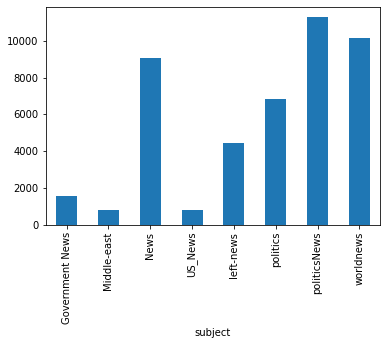

In [24]:
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


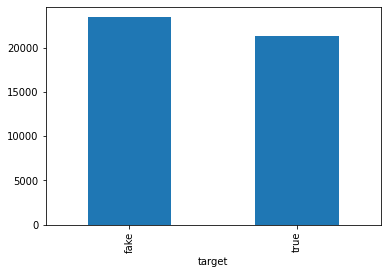

In [25]:
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

## Modeling

In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Split Data

In [27]:
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [28]:
X_test.head

<bound method NDFrame.head of 22216    baghdaderbil iraq reuters  baghdad heaped pres...
27917    chilpancingo mexico reuters  a protest by gove...
25007    raqqa syria reuters  usbacked militias battled...
1377     washington reuters  presumptive republican pre...
32476    london reuters  former us presidential candida...
                               ...                        
42119    seoul reuters  south korea s hyundai motor co ...
4068                                                      
22498    quetta pakistan reuters  pakistan s army chief...
14658    a fake economy can only sustain itself for so ...
15236    what will obama dowell obama has already calle...
Name: text, Length: 8980, dtype: object>

In [29]:
y_train.head()

36335    true
12384    fake
24419    true
24740    fake
27039    fake
Name: target, dtype: object

### Decision Tree Classifier

In [31]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
model = pipe.fit(X_train, y_train)

# filename = 'finalized_model.sav'
# pickle.dump(model, open(filename, 'wb'))

prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.58%


Confusion matrix, without normalization


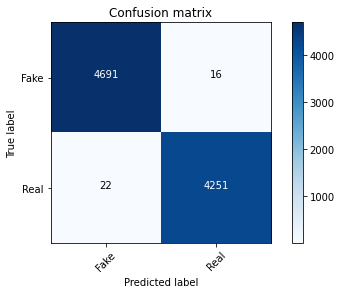

In [32]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])